In [2]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import string
import sys
import numpy as np

# import nltk
# from nltk.stem.porter import *

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.feature_extraction import stop_words
import xml.etree.cElementTree as ET
from collections import Counter

In [3]:
def genre(col):
    if col == "Metal":
        return  2
    if col == "Country":
        return 1
    else:
        return False

In [4]:
def genre(col):
    if col == "Metal":
        return  'Metal'
    if col == "Country":
        return 'Country'
    if col == "Hip-Hop":
        return 'Hip-Hop'
    if col == "Jazz":
        return 'Jazz'
    if col == "Electronic":
        return 'Electronic'
    else:
        return False

In [5]:
lyrics = pd.read_csv("lyrics.csv")
lyrics = lyrics.dropna()
lyrics["new_genre"] = lyrics["genre"].apply(genre)
lyrics = lyrics[lyrics["new_genre"] != False]
lyrics = shuffle(lyrics)

In [6]:
lyrics.head()

,index,song,year,artist,genre,lyrics,new_genre
164064,164064,wake-me-up,2006,b-charme,Electronic,"Wake me up, you know how you doing hey you\nWa...",Electronic
311616,311616,life-of-a-surgeon,2007,dead-infection,Metal,Richard graduated from a medical academy three...,Metal
274654,274654,love-vs-hate,2007,brand-nubian,Hip-Hop,"[Grand Puba]\nUhh..\nNow it's love, vs. hate\n...",Hip-Hop
191424,191424,crimson-winds,2006,dark-tranquility,Metal,-------------\n(Lyrics: Stanne)\nForce of ange...,Metal
191575,191575,bloodbath,2007,annihilator,Metal,"I'm dreaming of the lights, coming from behind...",Metal


In [7]:
train, test = train_test_split(lyrics,test_size=0.2)

In [8]:
print(f"Lenght training data: {len(train)}")
print(f"Lenght test data: {len(test)}")

Lenght training data: 63145
Lenght test data: 15787


In [9]:
labels = lyrics.genre.unique()
labels

array(['Electronic', 'Metal', 'Hip-Hop', 'Country', 'Jazz'], dtype=object)

In [10]:
vectorizer = CountVectorizer(input='content',
                             lowercase = True,
                             analyzer='word',
                             stop_words='english',
                             decode_error='ignore')
classifier = MultinomialNB(alpha=.1)

In [11]:
model = make_pipeline(vectorizer, classifier)
model.fit(train.lyrics, train.genre)
predicted = model.predict(test.genre)

In [12]:
accuracy = accuracy_score(predicted, test.genre)
print (f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


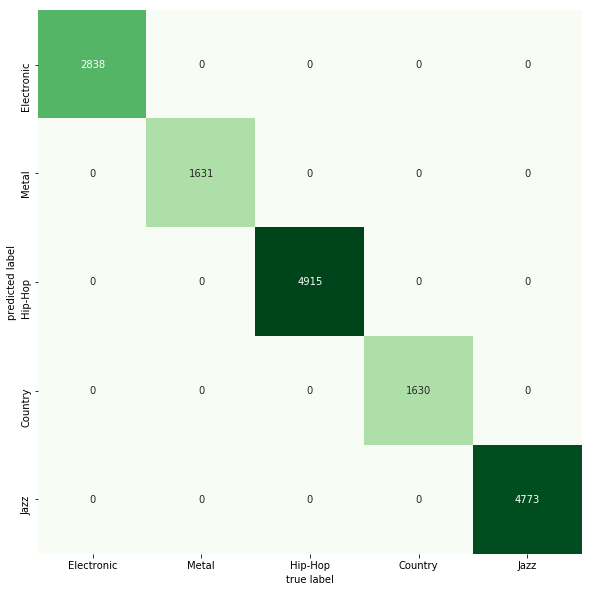

In [13]:
mat = confusion_matrix(test.genre, predicted)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels, cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
precision, recall, fscore, support = precision_recall_fscore_support(test.genre, predicted)

for n,genre in enumerate(labels):
    print(f'{genre} precision: {precision[n]:.2f}')
    print(f'{genre} recall: {recall[n]:.2f}')
    print(f'{genre} fscore: {fscore[n]:.2f}')
    #print(f'{genre} support: {support[n]:.2f}')
    print()

Electronic precision: 1.00
Electronic recall: 1.00
Electronic fscore: 1.00

Metal precision: 1.00
Metal recall: 1.00
Metal fscore: 1.00

Hip-Hop precision: 1.00
Hip-Hop recall: 1.00
Hip-Hop fscore: 1.00

Country precision: 1.00
Country recall: 1.00
Country fscore: 1.00

Jazz precision: 1.00
Jazz recall: 1.00
Jazz fscore: 1.00



In [15]:
def predictor(string, train=train.lyrics, model=model):
    pred = model.predict([string])
    return list(pred)[0]

In [47]:
predictor("Viviana Márquez")

'Hip-Hop'

In [48]:
predictor("Katja Wi")

'Hip-Hop'

In [49]:
predictor("Fiorella Tenorio")

'Hip-Hop'

In [19]:
predictor("Rebecca Reilly")

'Country'

In [37]:
predictor("Victoria Suarez")

'Metal'

In [16]:
predictor("ten chicks on the back of my pick up truck on a rainy day")

'Country'

In [17]:
predictor("new york yo mdma rolex yolo money")

'Hip-Hop'

In [50]:
proba_train = model.predict_proba(train.lyrics)
proba_test = model.predict_proba(test.lyrics)

In [51]:
train.loc[:, 'Proba_Country'] = proba_train[:,0]
train.loc[:, 'Proba_Metal'] = proba_train[:,1]

test.loc[:, 'Proba_Country'] = proba_test[:,0]
test.loc[:, 'Proba_Metal'] = proba_test[:,1]

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = new_genre.

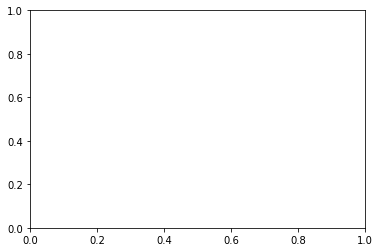

In [52]:
train.plot.scatter('Proba_Metal', 'Proba_Country', c='new_genre', colormap='jet')
#,figsize=(10,10)

In [53]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

genre_states = []
for s in states:
    genre_states.append(predictor(s))
    
state_data = pd.DataFrame(genre_states,states)
state_data.head()

,0
Alabama,Country
Alaska,Country
Arizona,Country
Arkansas,Country
California,Country
